In [1]:
from examples.util.getDataset import getDataset
from examples.util.plotting import plot_w
from examples.util.fns import *
from examples.util.testing import shrimp_v_random, growth
from examples.util.metrics import shrimp_test, make_l2_loss
from sparse_rf.util import *
from sparse_rf.modules import make_A, make_W
from sparse_rf.algs import shrimp, l2, l1, sindy
from functools import partial
import matplotlib.pyplot as plt
from math import ceil
import time

In [2]:
fn = fn26
q = 1
d = 100
m = 1000
l = 1e-13

trials = 5

In [3]:
all_errs = {"shrimp": {}, "l1": {}}
all_times = {"shrimp": {}, "l1": {}}

for N in [50000]:
    errs_shrimp = []
    times_shrimp = []
    errs_l1 = []
    times_l1 = []

    print("N={}".format(N))

    for _ in range(trials):
        Xtr, Xte, Ytr, Yte = getDataset(fn, d=d, m=m)

        start_t = time.time()
        best_model, train_mses, val_mses, lengths = shrimp(Xtr, Ytr, orderCands=[q], N=N, l=l, scale=1/np.sqrt(q), verbose=0)
        w_shrimp, Ate_s = shrimp_test(best_model, Xte)
        l2_loss_s = make_l2_loss(Ate_s, Yte)
        errs_shrimp.append(l2_loss_s(w_shrimp))
        times_shrimp.append(time.time()-start_t)

        # Atr = make_A(Xtr, best_model.W)
        # start_t = time.time()
        # c = l1(Atr, Ytr, eta=1)
        # errs_l1.append(l2_loss_s(c))
        # times_l1.append(time.time()-start_t)


    err_shrimp = np.mean(errs_shrimp)
    # err_l1 = np.mean(errs_l1)
    time_shrimp = np.mean(times_shrimp)
    # time_l1 = np.mean(times_l1)

    all_errs["shrimp"][N] = err_shrimp
    # all_errs["l1"][N] = err_l1
    all_times["shrimp"][N] = time_shrimp
    # all_times["l1"][N] = time_l1

    print("Mean shrimp err: {}".format(err_shrimp))
    # print("Mean l1 err: {}".format(err_l1))
    print("Mean shrimp time: {}".format(time_shrimp))
    # print("Mean l1 time: {}".format(time_l1))

    print("---------------------------------")

N=50000
Mean shrimp err: 4.5806663027497233e-07
Mean shrimp time: 17.85649185180664
---------------------------------


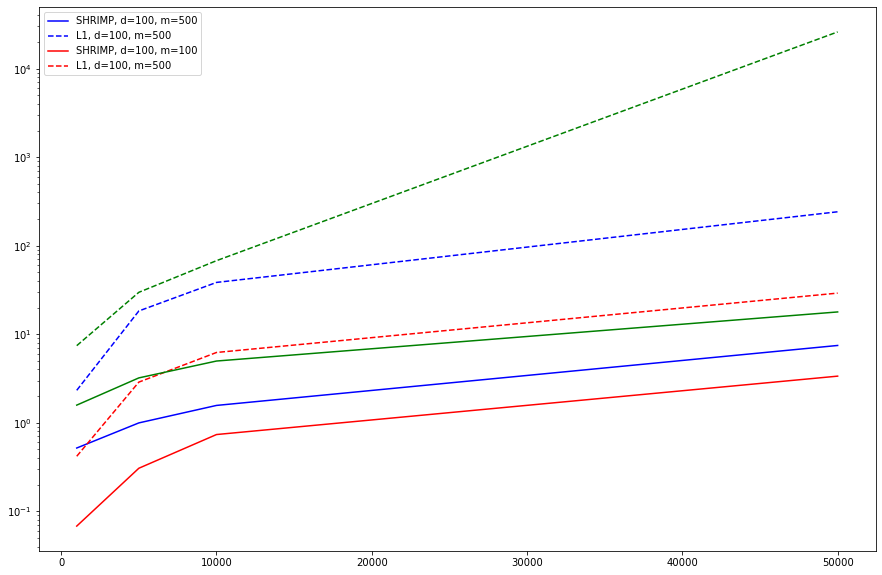

In [7]:
plt.figure(figsize=(15, 10))
plt.semilogy([1000, 5000, 10000, 50000], [0.5185189247131348, 0.9964443683624268, 1.5699488162994384, 7.467233037948608], color="blue", linestyle="solid", label="SHRIMP, d=100, m=500")
plt.semilogy([1000, 5000, 10000, 50000], [2.3256581306457518, 18.322029018402098, 38.48430032730103, 241.6562035560608], color="blue", linestyle="dashed", label="L1, d=100, m=500")
plt.semilogy([1000, 5000, 10000, 50000], [0.06806001663208008, 0.3064311981201172, 0.7362387180328369, 3.3621389865875244], color="red", linestyle="solid", label="SHRIMP, d=100, m=100")
plt.semilogy([1000, 5000, 10000, 50000], [0.4184398651123047, 2.879335403442383, 6.222855949401856, 29.13980164527893], color="red", linestyle="dashed", label="L1, d=100, m=500")
plt.semilogy([1000, 5000, 10000, 50000], [1.582361364364624, 3.2128927230834963, 4.98141622543335, 17.85649185180664], color="green", linestyle="solid")
plt.semilogy([1000, 5000, 10000, 50000], [7.428990077972412, 29.760014152526857, 67.77042727470398, 26000], color="green", linestyle="dashed")
plt.legend(loc="best")
plt.show()